In [1]:
import os
import warnings

# pandas 관련 모듈
import numpy as np
import pandas as pd
import datetime
import holidays

# 시각화 모듈
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 분석에 문제 없는 경고 메세지 숨기기
warnings.filterwarnings("ignore")

# 접근 기본 디렉토리 변경 (사람마다 다름)
os.chdir('D:/Jupyter/cap1')

# seaborn 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
data_origin = pd.read_csv('./final_merge_data.csv', encoding = 'utf-8')

In [4]:
data = data_origin.copy()
data

,date,holiday,year,month,day,hour,gu_code,gu,temp,wind,rain,humidity,dust,people,people_perc
0,2017-01-01,2,2017,1,6,0,11110,종로구,2.0,0.4,0.0,80.4,54.0,283391,0.045996
1,2017-01-01,2,2017,1,6,0,11140,중구,2.0,0.4,0.0,80.4,54.0,189272,0.041112
2,2017-01-01,2,2017,1,6,0,11170,용산구,2.0,0.4,0.0,80.4,54.0,288680,0.041923
3,2017-01-01,2,2017,1,6,0,11200,성동구,2.0,0.4,0.0,80.4,54.0,313852,0.041361
4,2017-01-01,2,2017,1,6,0,11215,광진구,2.0,0.4,0.0,80.4,54.0,382976,0.041346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314595,2022-12-31,2,2022,12,5,23,11620,관악구,-1.0,1.0,0.0,60.9,70.0,468533,0.042621
1314596,2022-12-31,2,2022,12,5,23,11650,서초구,-1.0,1.0,0.0,60.9,70.0,464794,0.039558
1314597,2022-12-31,2,2022,12,5,23,11680,강남구,-1.0,1.0,0.0,60.9,70.0,626217,0.037761
1314598,2022-12-31,2,2022,12,5,23,11710,송파구,-1.0,1.0,0.0,60.9,70.0,726058,0.041104


In [10]:
data.groupby(['hour']).mean()['people'].sort_values()

hour
3     415694.745212
4     415709.208307
2     415830.688599
5     415928.105906
1     416070.063003
0     416488.139461
6     416943.452597
23    417412.028462
7     420876.295080
22    420940.881972
21    423874.062236
20    426267.870580
8     426279.773181
19    428755.568763
9     430084.033209
10    432079.183770
18    432500.841168
11    433197.764765
12    434210.545431
17    434906.950324
13    435214.074724
16    435536.822802
14    435773.217216
15    435827.198813
Name: people, dtype: float64

새벽 3시가 사람이 가장 적다는 것을 알 수 있다. -> 새벽 3시 기준으로 유동인구 파악

In [13]:
data.groupby(['gu_code', 'date', 'hour']).mean()

holiday    year  month  day  temp  wind  rain  \
gu_code date       hour                                                  
11110   2017-01-01 0         2.0  2017.0    1.0  6.0   2.0   0.4   0.0   
                   1         2.0  2017.0    1.0  6.0   2.1   0.5   0.0   
                   2         2.0  2017.0    1.0  6.0   1.6   0.6   0.0   
                   3         2.0  2017.0    1.0  6.0   1.3   0.5   0.0   
                   4         2.0  2017.0    1.0  6.0   1.1   0.3   0.0   
...                          ...     ...    ...  ...   ...   ...   ...   
11740   2022-12-31 19        2.0  2022.0   12.0  5.0  -0.1   0.6   0.0   
                   20        2.0  2022.0   12.0  5.0  -0.6   1.1   0.0   
                   21        2.0  2022.0   12.0  5.0  -0.6   1.2   0.0   
                   22        2.0  2022.0   12.0  5.0  -1.0   1.2   0.0   
                   23        2.0  2022.0   12.0  5.0  -1.0   1.0   0.0   

                         humidity  dust    people  people_perc  
gu_code date       hour                                         
11110   2017-01-01 0         80.4  54.0  283391.0     0.045996  
                   1         82.4  70.0  240461.0     0.039028  
                   2         82.2  68.0  231657.0     0.037599  
                   3         83.4  65.0  227495.0     0.036924  
                   4         84.8  58.0  226370.0     0.036741  
...                           ...   ...       ...          ...  
11740   2022-12-31 19        52.1  52.0  495518.0     0.041032  
                   20        56.5  50.0  500961.0     0.041483  
                   21        56.8  50.0  506973.0     0.041981  
                   22        59.7  63.0  513082.0     0.042486  
                   23        60.9  70.0  515174.0     0.042660  

[1314600 rows x 11 columns]

In [22]:
resident = data[['gu_code', 'date', 'hour', 'people']]
resident = resident[resident['hour']==3]
resident = resident.reset_index()
resident = resident.drop(['hour', 'index'], axis = 1)
resident

,gu_code,date,people
0,11110,2017-01-01,227495
1,11140,2017-01-01,158427
2,11170,2017-01-01,270181
3,11200,2017-01-01,312212
4,11215,2017-01-01,381230
...,...,...,...
54770,11620,2022-12-31,487414
54771,11650,2022-12-31,451885
54772,11680,2022-12-31,637171
54773,11710,2022-12-31,720087


인구수 분포 알아보기

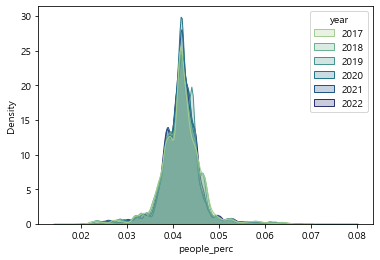

In [5]:
people_data1 = data[['year', 'people_perc']]

sns.kdeplot(data = people_data1, x='people_perc', hue = 'year', fill = True, palette = 'crest')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

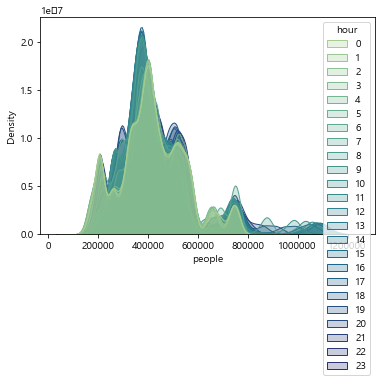

In [25]:
people_data2 = data[['hour', 'people']]

sns.kdeplot(data = people_data2, x='people', hue = 'hour', fill = True, palette = 'crest')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

In [6]:
data['people_perc'].describe()

count    1.314600e+06
mean     4.168106e-02
std      4.518436e-03
min      1.513663e-02
25%      3.944082e-02
50%      4.171809e-02
75%      4.374854e-02
max      7.905792e-02
Name: people_perc, dtype: float64

In [7]:
conditionlist = [
    (data['people_perc'] >= data['people_perc'].quantile(q=0.8)) ,
    (data['people_perc'] >= data['people_perc'].quantile(q=0.6)) & (data['people_perc'] <data['people_perc'].quantile(q=0.8)),
    (data['people_perc'] >= data['people_perc'].quantile(q=0.4)) & (data['people_perc'] <data['people_perc'].quantile(q=0.6)),
    (data['people_perc'] >= data['people_perc'].quantile(q=0.2)) & (data['people_perc'] <data['people_perc'].quantile(q=0.4)),
    (data['people_perc'] <= data['people_perc'].quantile(q=0.2))]
choicelist = [4, 3, 2, 1, 0]
data['congestion'] = np.select(conditionlist, choicelist, default='Not Specified')

data['congestion'] = data['congestion'].astype('int64')

In [8]:
data

,date,holiday,year,month,day,hour,gu_code,gu,temp,wind,rain,humidity,dust,people,people_perc,congestion
0,2017-01-01,2,2017,1,6,0,11110,종로구,2.0,0.4,0.0,80.4,54.0,283391,0.045996,4
1,2017-01-01,2,2017,1,6,0,11140,중구,2.0,0.4,0.0,80.4,54.0,189272,0.041112,2
2,2017-01-01,2,2017,1,6,0,11170,용산구,2.0,0.4,0.0,80.4,54.0,288680,0.041923,2
3,2017-01-01,2,2017,1,6,0,11200,성동구,2.0,0.4,0.0,80.4,54.0,313852,0.041361,2
4,2017-01-01,2,2017,1,6,0,11215,광진구,2.0,0.4,0.0,80.4,54.0,382976,0.041346,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314595,2022-12-31,2,2022,12,5,23,11620,관악구,-1.0,1.0,0.0,60.9,70.0,468533,0.042621,3
1314596,2022-12-31,2,2022,12,5,23,11650,서초구,-1.0,1.0,0.0,60.9,70.0,464794,0.039558,1
1314597,2022-12-31,2,2022,12,5,23,11680,강남구,-1.0,1.0,0.0,60.9,70.0,626217,0.037761,0
1314598,2022-12-31,2,2022,12,5,23,11710,송파구,-1.0,1.0,0.0,60.9,70.0,726058,0.041104,2


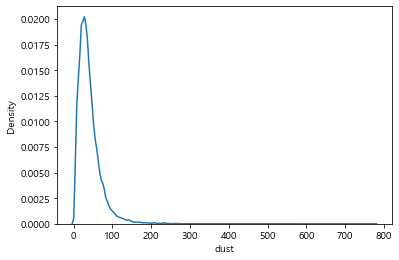

In [9]:
sns.kdeplot(data = data['dust'])
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

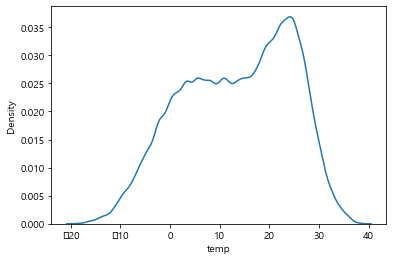

In [10]:
sns.kdeplot(data = data['temp'])
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

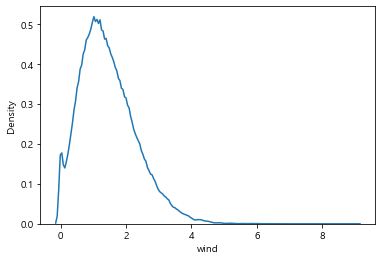

In [11]:
sns.kdeplot(data = data['wind'])
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

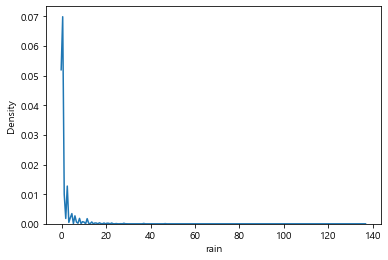

In [12]:
sns.kdeplot(data = data['rain'])
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

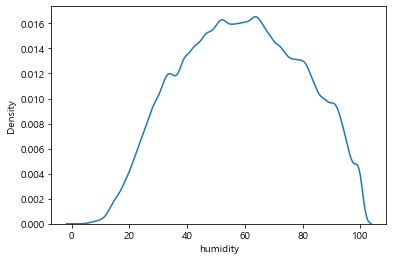

In [13]:
sns.kdeplot(data = data['humidity'])
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

In [15]:
using_data = data[['gu_code', 'month', 'holiday', 'day', 'hour', 'temp', 'wind', 'rain', 'humidity', 'dust', 'congestion']]
using_data

,gu_code,month,holiday,day,hour,temp,wind,rain,humidity,dust,congestion
0,11110,1,2,6,0,2.0,0.4,0.0,80.4,54.0,4
1,11140,1,2,6,0,2.0,0.4,0.0,80.4,54.0,2
2,11170,1,2,6,0,2.0,0.4,0.0,80.4,54.0,2
3,11200,1,2,6,0,2.0,0.4,0.0,80.4,54.0,2
4,11215,1,2,6,0,2.0,0.4,0.0,80.4,54.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1314595,11620,12,2,5,23,-1.0,1.0,0.0,60.9,70.0,3
1314596,11650,12,2,5,23,-1.0,1.0,0.0,60.9,70.0,1
1314597,11680,12,2,5,23,-1.0,1.0,0.0,60.9,70.0,0
1314598,11710,12,2,5,23,-1.0,1.0,0.0,60.9,70.0,2


In [16]:
using_data.to_csv('./final_using_data.csv', index=False, encoding='utf-8-sig')